<a href="https://colab.research.google.com/github/szh141/colab/blob/main/pixel_classifier_using_ML_segmentation_vs_K_means_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K means segmentation
https://www.youtube.com/watch?v=6CqRnx6Ic48

https://github.com/bnsreenu/python_for_microscopists/blob/master/images/BSE_Image.jpg

pixel classifier
https://www.youtube.com/watch?v=6yW31TT6-wA

https://github.com/bnsreenu/python_for_microscopists/blob/master/images/Train_images/Sandstone_Versa0000.tif

(1024, 996)

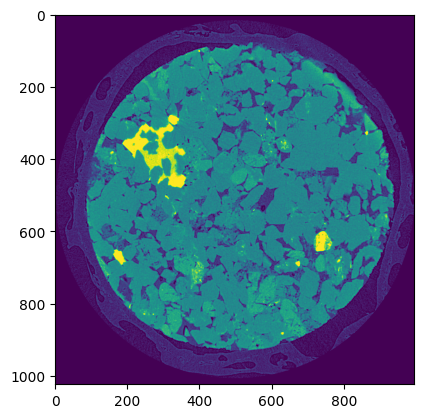

In [2]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
img = io.imread('/content/Sandstone_Versa0000.tif')
plt.imshow(img)
img.shape

compared to the youtube tutorial, the outer dark blue ring is manually labeled to the background.

Here I will mask out the outer ring, set the outer background to grey value 50 as measured by Fiji.

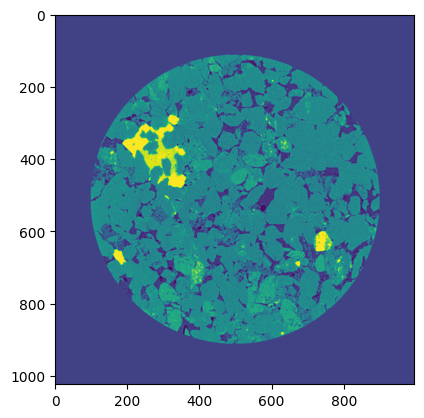

In [ ]:
center = (img.shape[0]/2,img.shape[1]/2)
x,y = np.meshgrid(range(img.shape[1]),range(img.shape[0]))
mask = np.sqrt((x-center[1])**2 + (y-center[0])**2)<400
mask_img = mask*img
mask_img[mask == 0] = 50
plt.imshow(mask_img)

In [ ]:
img2 = mask_img.reshape(-1,1)
img2.shape

(1019904, 1)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(img2)


"""
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_
"""

'\nkmeans.predict([[0, 0], [12, 3]])\nkmeans.cluster_centers_\n'

In [ ]:
kmeans.cluster_centers_

# 4x3 matrix
# 4 centers in 3 channels
# the value is intensity

array([[ 49.66795694],
       [135.24801113],
       [239.82263763],
       [112.65727791]])

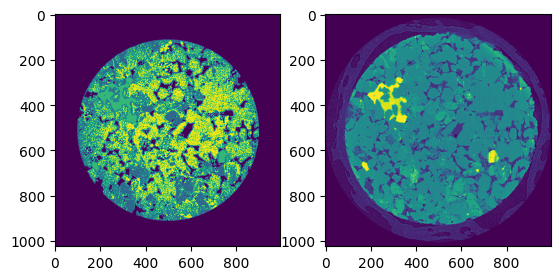

In [ ]:
res = kmeans.labels_.reshape(img.shape)
plt.subplot(121)
plt.imshow(res)
plt.subplot(122)
plt.imshow(img)

The brightest pixels 255, the yellow in the original image, has more brightest pixels in the segmentation. K means isn't working the best. We will resort to supervised ML segmentation.

In [3]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

img = io.imread('/content/Sandstone_Versa0000.tif')
print(img.shape)
img2 = img.reshape(-1)
print(img2.shape)

df = pd.DataFrame()

#add original intensity as feature #1
df['Original Image'] = img2

#add other features
# first set -- Gabor filters



(1024, 996)
(1019904,)


In [4]:
#Generate Gabor features

from skimage.filters import gabor_kernel
from scipy import ndimage as ndi

num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
            #Now filter the image and add values to a new column
            fimg = ndi.convolve(img, kernel, mode='wrap')
            filtered_img = fimg.reshape(-1)
            df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
            print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': frequency=', frequency)
            num += 1  #Increment for gabor column label

print(df.head())

df.to_csv("Gabor.csv")






Gabor1 : theta= 0.0 : sigma= 1 : frequency= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : frequency= 0.25
Gabor3 : theta= 0.0 : sigma= 3 : frequency= 0.05
Gabor4 : theta= 0.0 : sigma= 3 : frequency= 0.25
Gabor5 : theta= 0.7853981633974483 : sigma= 1 : frequency= 0.05
Gabor6 : theta= 0.7853981633974483 : sigma= 1 : frequency= 0.25
Gabor7 : theta= 0.7853981633974483 : sigma= 3 : frequency= 0.05
Gabor8 : theta= 0.7853981633974483 : sigma= 3 : frequency= 0.25
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0               0       0       0       0       0       0       0       0   
1               0       0       0       0       0       0       0       0   
2               0       0       0       0       0       0       0       0   
3               0       0       0       0       0       0       0       0   
4               0       0       0       0       0       0       0       0   

   Gabor8  
0       0  
1       0  
2       0  
3       0  
4       0  


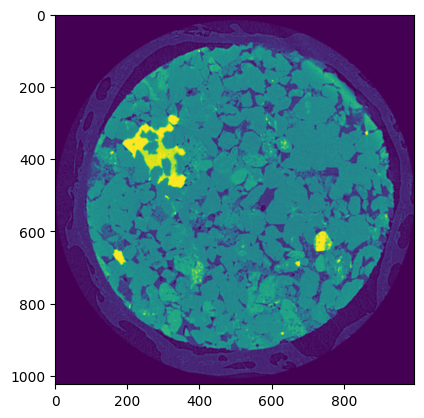

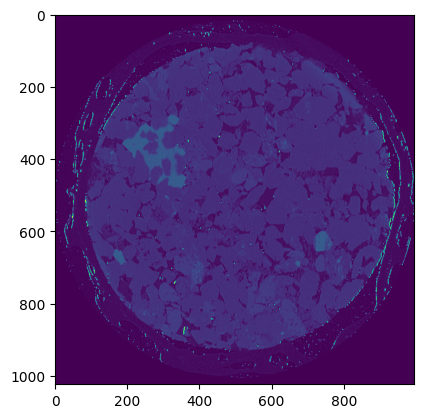

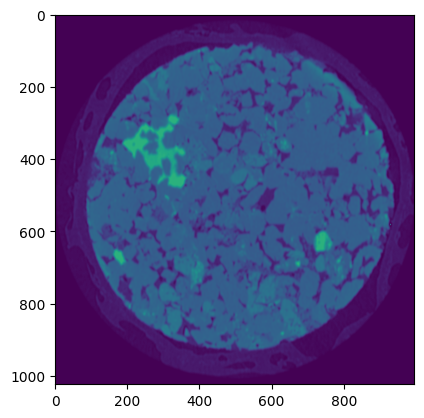

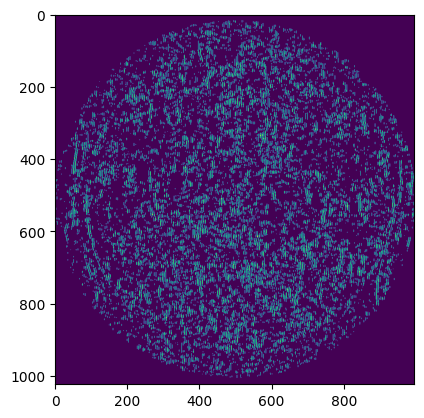

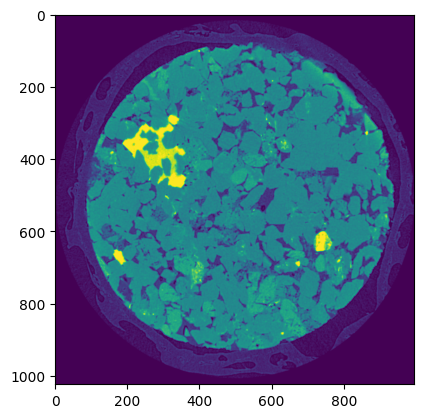

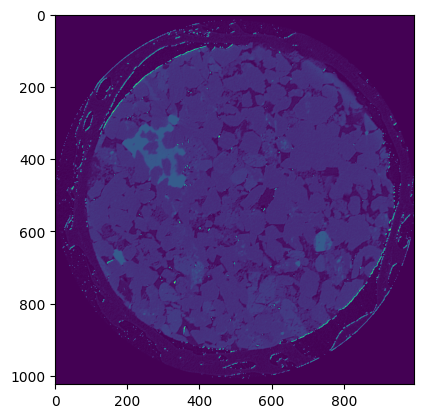

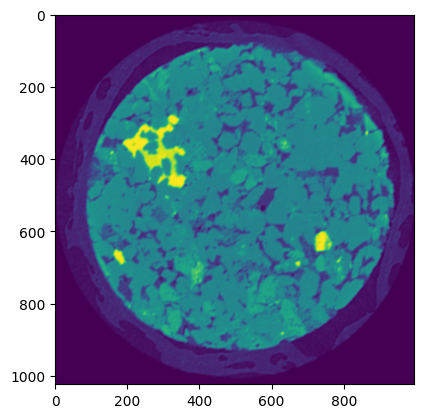

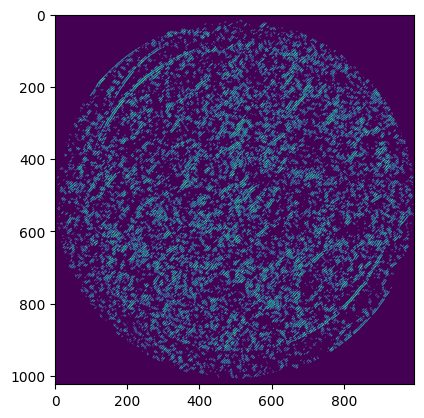

In [ ]:
for i in range(1,9):
  test_a = df['Gabor%s'%i]
  img_a = np.array(test_a)
  img_b = img_a.reshape(img.shape)
  plt.imshow(img_b)
  plt.show()

In [9]:
#canny edge
from skimage import feature
edge1 = feature.canny(img)
df['canny edge'] = edge1.reshape(-1)

from skimage.filters import roberts,sobel,scharr,prewitt,gaussian
edge2 = roberts(img)
df['roberts edge'] = edge2.reshape(-1)
edge3 = sobel(img)
df['sobel edge'] = edge3.reshape(-1)
edge4 = scharr(img)
df['scharr edge'] = edge4.reshape(-1)
edge5 = prewitt(img)
df['prewitt edge'] = edge5.reshape(-1)

edge6 = gaussian(img,sigma =3)
df['gaussian 3'] = edge6.reshape(-1)
edge7 = gaussian(img,sigma = 7)
df['gaussian 7'] = edge7.reshape(-1)

#maybe media filter, etc.

df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,canny edge,roberts edge,sobel edge,scharr edge,prewitt edge,gaussian 3,gaussian 7
0,0,0,0,0,0,0,0,0,0,False,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,False,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,False,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,False,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,False,0.0,0.0,0.0,0.0,0.0,0.0


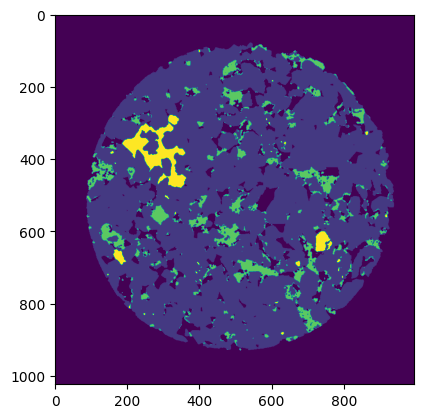

In [56]:
sand_mask = io.imread('/content/Sandstone_Versa0000_mask.tif')
#Fiji resave mask to tif RGB
from skimage import color
sand_mask2 = color.rgb2gray(sand_mask)

#float mask or label is not continuous
from skimage import img_as_ubyte
sand_mask3 = img_as_ubyte(sand_mask2)
np.unique(sand_mask3)

plt.imshow(sand_mask3)
plt.show()
df['mask'] = sand_mask3.reshape(-1)

In [57]:
# dependent variable

y = df['mask'].values

#independent variable
#keep everything except the mask column

X = df.drop(labels = ['mask'],axis=1)
#X_1 = X.drop(labels =['canny edge'],axis=1) #binary

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 20)

In [58]:
X_train.shape

(611942, 16)

In [43]:
y_train.shape

(611942,)

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,random_state = 42)

model.fit(X_train,y_train)

#first test accuracy on the original image
prediction_train = model.predict(X_test)
#random forest model.predict yields probablity
#prediction_train.prob_

In [61]:
prediction_train = model.predict(X_test)
from sklearn import metrics
print('Accuracy = ',metrics.accuracy_score(y_test,prediction_train))

Accuracy =  0.9826062231286248
